In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score


In [6]:
df=pd.read_csv('/content/ecommerce_sales_data.csv')

In [7]:
dts=df.copy()

In [8]:
dts.head(3)

,Order ID,Date,Product,Category,Price,Quantity,Customer Age,Region,Payment Method,Sales Revenue
0,1001,2024-01-25,Sneakers,Clothing,60,5,43,East,Debit Card,300
1,1002,2024-01-12,Mouse,Electronics,15,1,29,West,Debit Card,15
2,1003,2024-01-16,T-Shirt,Clothing,20,2,30,South,Credit Card,40


In [9]:
dts.shape

(10000, 10)

In [10]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order ID        10000 non-null  int64 
 1   Date            10000 non-null  object
 2   Product         10000 non-null  object
 3   Category        10000 non-null  object
 4   Price           10000 non-null  int64 
 5   Quantity        10000 non-null  int64 
 6   Customer Age    10000 non-null  int64 
 7   Region          10000 non-null  object
 8   Payment Method  10000 non-null  object
 9   Sales Revenue   10000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 781.4+ KB


In [11]:
dts.duplicated().sum()

np.int64(0)

In [12]:
dts.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Customer Age,0
Region,0
Payment Method,0
Sales Revenue,0


In [13]:
corr=dts.corr(numeric_only=True)
print(corr)

               Order ID     Price  Quantity  Customer Age  Sales Revenue
Order ID       1.000000  0.015410 -0.007472     -0.004339       0.012983
Price          0.015410  1.000000  0.000500     -0.017016       0.865208
Quantity      -0.007472  0.000500  1.000000     -0.000226       0.297107
Customer Age  -0.004339 -0.017016 -0.000226      1.000000      -0.009509
Sales Revenue  0.012983  0.865208  0.297107     -0.009509       1.000000


In [14]:
dts.value_counts()

,,,,,,,,,,count
Order ID,Date,Product,Category,Price,Quantity,Customer Age,Region,Payment Method,Sales Revenue,
10984,2024-01-13,Sneakers,Clothing,60,2,58,West,Debit Card,120,1
10983,2024-01-22,T-Shirt,Clothing,20,1,55,North,Credit Card,20,1
10982,2024-01-27,T-Shirt,Clothing,20,2,27,West,PayPal,40,1
10981,2024-01-25,Mouse,Electronics,15,3,27,South,Debit Card,45,1
10980,2024-01-10,Headphones,Electronics,50,4,24,West,Credit Card,200,1
...,...,...,...,...,...,...,...,...,...,...
1005,2024-01-24,Mouse,Electronics,15,5,51,North,PayPal,75,1
1004,2024-01-29,Cap,Clothing,10,1,32,West,Credit Card,10,1
1003,2024-01-16,T-Shirt,Clothing,20,2,30,South,Credit Card,40,1


In [15]:
dts.drop(['Order ID','Date'],axis=1,inplace=True)

In [16]:
dts.head(3)

,Product,Category,Price,Quantity,Customer Age,Region,Payment Method,Sales Revenue
0,Sneakers,Clothing,60,5,43,East,Debit Card,300
1,Mouse,Electronics,15,1,29,West,Debit Card,15
2,T-Shirt,Clothing,20,2,30,South,Credit Card,40


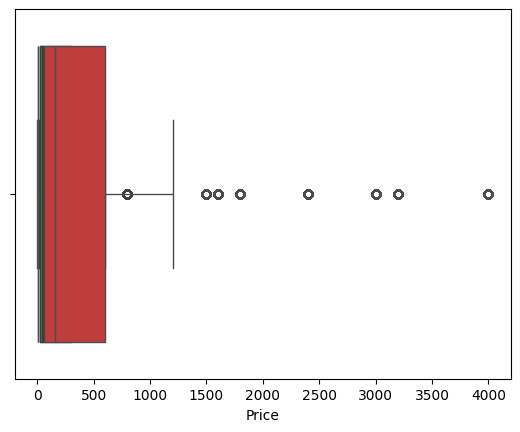

In [17]:
for col in dts.select_dtypes(include=['number']).columns:
  sns.boxplot(x=dts[col])


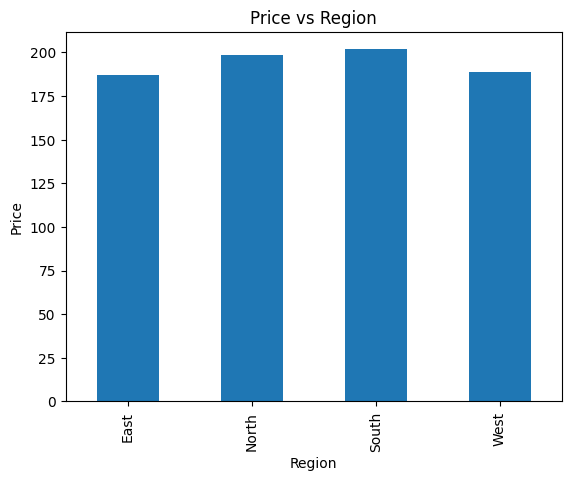

In [18]:
dts.groupby('Region')['Price'].mean().plot(kind='bar')
plt.title('Price vs Region')
plt.ylabel('Price')
plt.show()

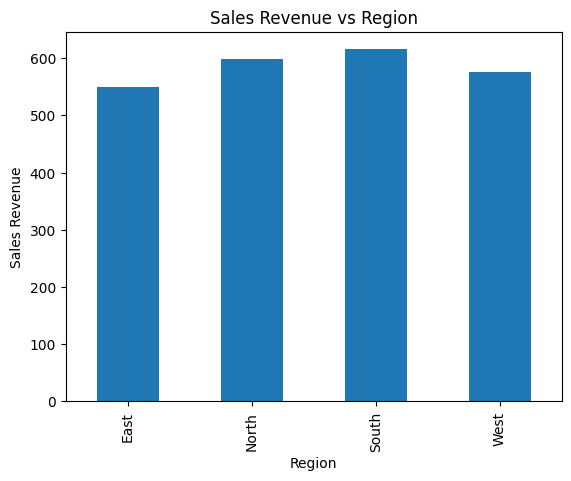

In [19]:
dts.groupby('Region')['Sales Revenue'].mean().plot(kind='bar')
plt.title('Sales Revenue vs Region')
plt.ylabel('Sales Revenue')
plt.show()

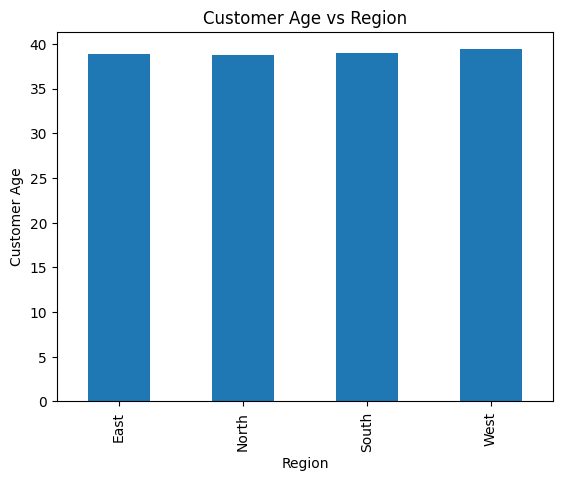

In [20]:
dts.groupby('Region')['Customer Age'].mean().plot(kind='bar')
plt.title('Customer Age vs Region')
plt.ylabel('Customer Age')
plt.show()

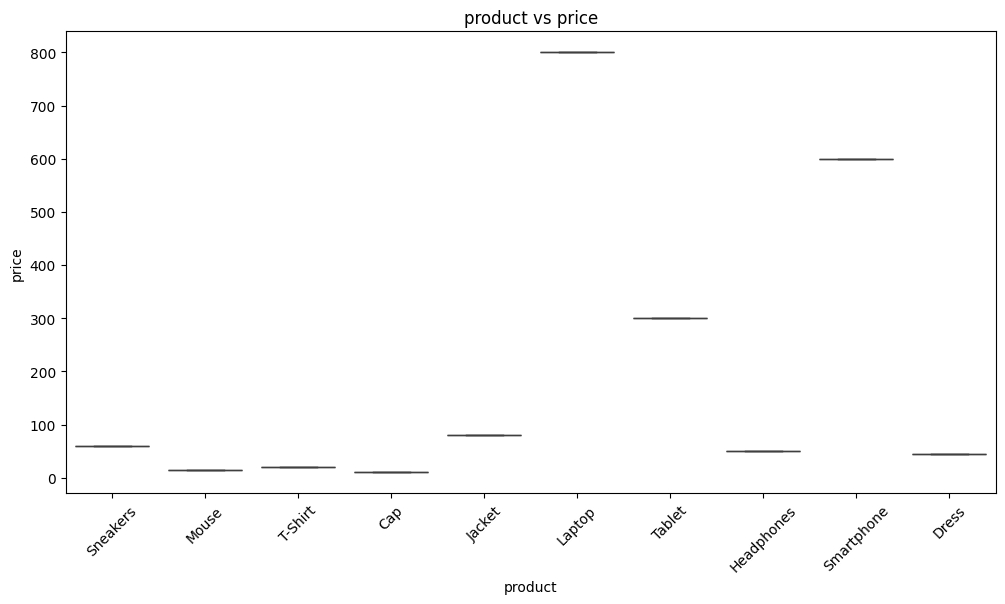

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Product',y='Price',data=dts)
plt.title('product vs price')
plt.xticks(rotation=45)
plt.xlabel('product')
plt.ylabel('price')
plt.show()

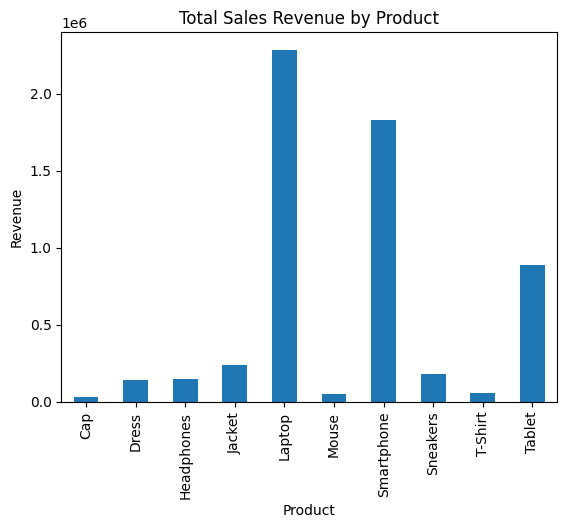

In [22]:
dts.groupby('Product')['Sales Revenue'].sum().plot(kind='bar')
plt.title('Total Sales Revenue by Product')
plt.ylabel('Revenue')
plt.show()

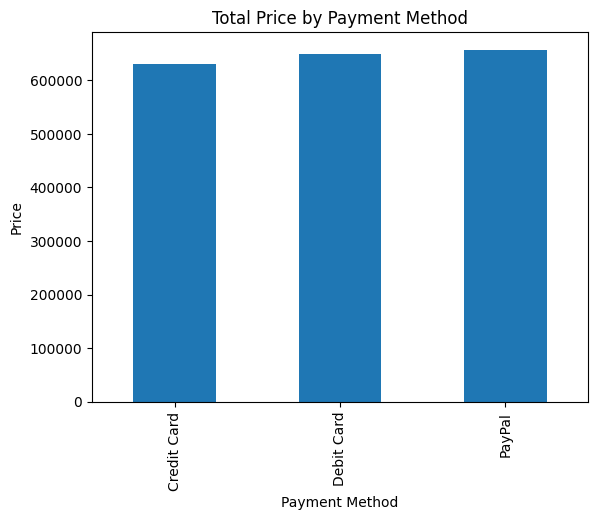

In [24]:
dts.groupby('Payment Method')['Price'].sum().plot(kind='bar')
plt.title('Total Price by Payment Method')
plt.ylabel('Price')
plt.show()

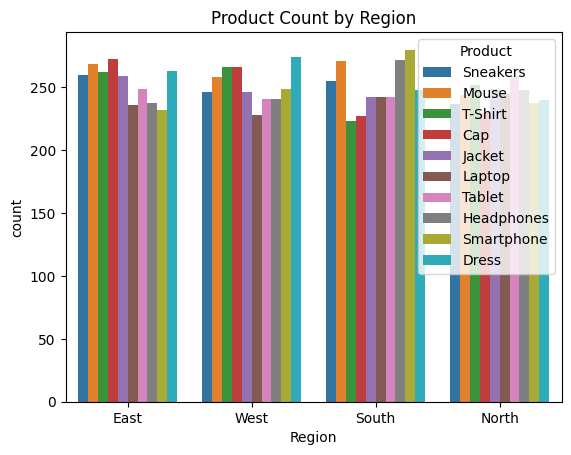

In [31]:
sns.countplot(x='Region', hue='Product', data=dts)
plt.title('Product Count by Region')
plt.show()

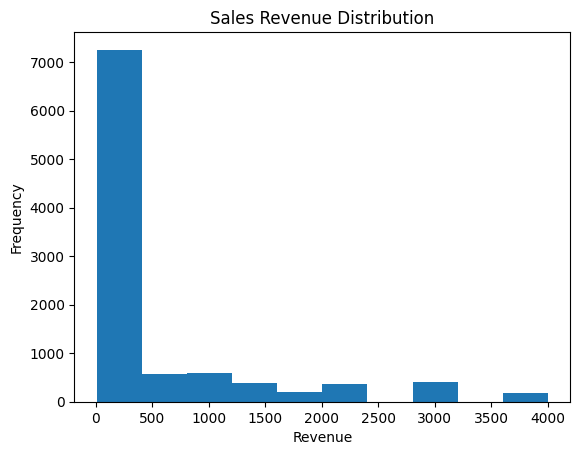

In [30]:
plt.hist(dts['Sales Revenue'], bins=10)
plt.title('Sales Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

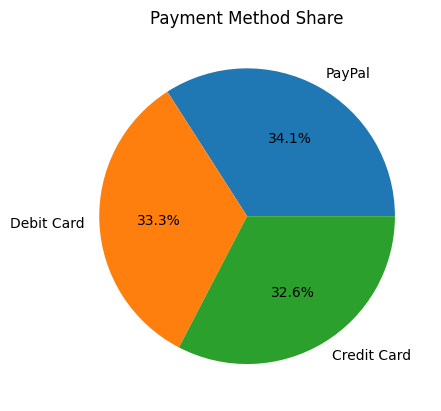

In [29]:
dts['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Payment Method Share')
plt.ylabel('')
plt.show()

In [33]:
x=dts.drop('Payment Method',axis=1)
y=dts['Payment Method']

In [40]:
le=LabelEncoder()
for col in x.select_dtypes(include='object').columns:
  x[col]=le.fit_transform(x[col])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy:',acc)

Accuracy: 0.3055


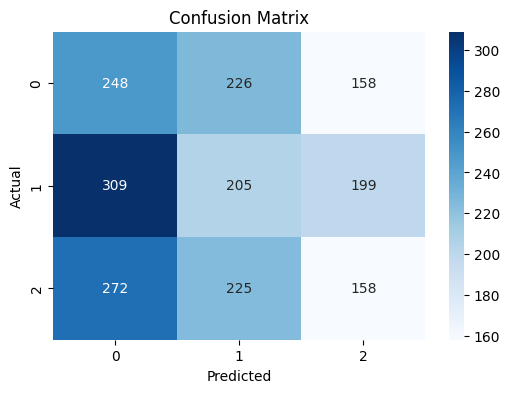

In [46]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
model_tuned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [50]:
y_pred_tuned = model_tuned.predict(x_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

Tuned Accuracy: 0.316


In [58]:
y_pred = model_tuned.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.316
Precision: 0.32403870803484036
Recall: 0.316
F1 Score: 0.3055763845291302


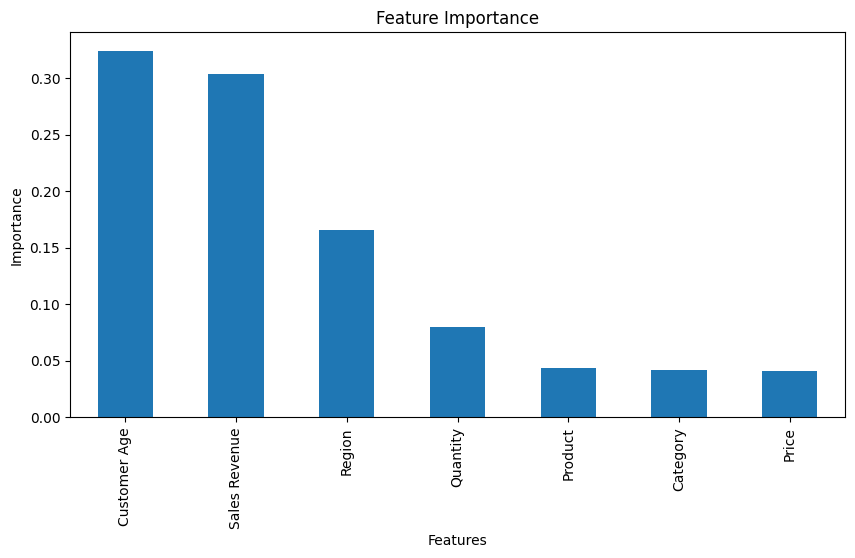

In [60]:

importance = pd.Series(model_tuned.feature_importances_, index=x.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [62]:

y_pred = model_tuned.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.37      0.33       632
           1       0.35      0.17      0.23       713
           2       0.31      0.42      0.36       655

    accuracy                           0.32      2000
   macro avg       0.32      0.32      0.31      2000
weighted avg       0.32      0.32      0.31      2000



In [64]:

feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature  Importance
4   Customer Age    0.324528
6  Sales Revenue    0.303817
5         Region    0.165873
3       Quantity    0.079998
0        Product    0.043212
1       Category    0.042028
2          Price    0.040542
